In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [44]:
# Load the data from the CSV file
df = pd.read_excel('/content/stock.xlsx')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [46]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [47]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
# Sort the DataFrame by date in ascending order
df = df.sort_values('Date')

In [49]:
# Extract the 'Close' column (our target variable)
dataset = df[['Close']].values.astype(float)

In [50]:
# Normalize the dataset using Min-Max scaling to bring values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [51]:
# Function to create input sequences and corresponding target values
def create_sequences(dataset, look_back=1):
    data_X, data_y = [], []
    for i in range(len(dataset) - look_back):
        data_X.append(dataset[i:(i + look_back), 0])
        data_y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_y)

In [52]:
# Set the look-back period (number of previous time steps to use for prediction)
look_back = 30

In [53]:
# Create input sequences and target values
X, y = create_sequences(dataset, look_back)

In [54]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [55]:
# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [56]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [57]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1403/1403 - 7s - loss: 0.0011 - 7s/epoch - 5ms/step
Epoch 2/100
1403/1403 - 6s - loss: 3.1839e-04 - 6s/epoch - 4ms/step
Epoch 3/100
1403/1403 - 5s - loss: 2.2856e-04 - 5s/epoch - 4ms/step
Epoch 4/100
1403/1403 - 5s - loss: 1.9015e-04 - 5s/epoch - 4ms/step
Epoch 5/100
1403/1403 - 6s - loss: 1.7095e-04 - 6s/epoch - 4ms/step
Epoch 6/100
1403/1403 - 5s - loss: 1.5696e-04 - 5s/epoch - 4ms/step
Epoch 7/100
1403/1403 - 6s - loss: 1.6155e-04 - 6s/epoch - 4ms/step
Epoch 8/100
1403/1403 - 5s - loss: 1.6143e-04 - 5s/epoch - 4ms/step
Epoch 9/100
1403/1403 - 6s - loss: 1.5766e-04 - 6s/epoch - 4ms/step
Epoch 10/100
1403/1403 - 5s - loss: 1.5135e-04 - 5s/epoch - 4ms/step
Epoch 11/100
1403/1403 - 5s - loss: 1.4389e-04 - 5s/epoch - 4ms/step
Epoch 12/100
1403/1403 - 5s - loss: 1.4982e-04 - 5s/epoch - 4ms/step
Epoch 13/100
1403/1403 - 5s - loss: 1.4415e-04 - 5s/epoch - 4ms/step
Epoch 14/100
1403/1403 - 6s - loss: 1.4274e-04 - 6s/epoch - 4ms/step
Epoch 15/100
1403/1403 - 5s - loss: 1.4330e-04 

In [58]:
# Generate predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [59]:
# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [60]:
# Calculate the root mean squared error (RMSE) to evaluate the model's performance
train_score = np.sqrt(np.mean((y_train[0] - train_predict[:, 0])**2))
print(f"Train RMSE: {train_score:.2f}")

Train RMSE: 3.08


In [61]:
test_score = np.sqrt(np.mean((y_test[0] - test_predict[:, 0])**2))
print(f"Test RMSE: {test_score:.2f}")

Test RMSE: 13.28


In [62]:
# Find the day with the highest and lowest closing value
max_close_day = df.loc[df['Close'].idxmax()]['Date']
min_close_day = df.loc[df['Close'].idxmin()]['Date']

print(f"Day with highest closing value: {max_close_day}")
print(f"Day with lowest closing value: {min_close_day}")

Day with highest closing value: 2018-01-12 00:00:00
Day with lowest closing value: 2011-11-23 00:00:00


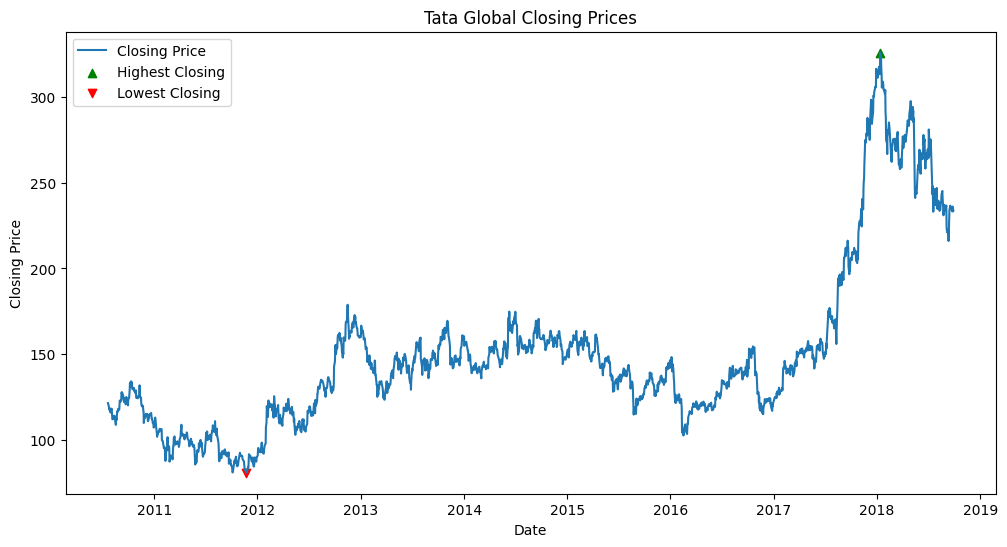

In [63]:
# Plot the historical closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.scatter(max_close_day, df.loc[df['Close'].idxmax()]['Close'], color='green', label='Highest Closing', marker='^')
plt.scatter(min_close_day, df.loc[df['Close'].idxmin()]['Close'], color='red', label='Lowest Closing', marker='v')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tata Global Closing Prices')
plt.legend()
plt.show()

In [64]:
# Calculate the rolling mean and standard deviation of the closing prices
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

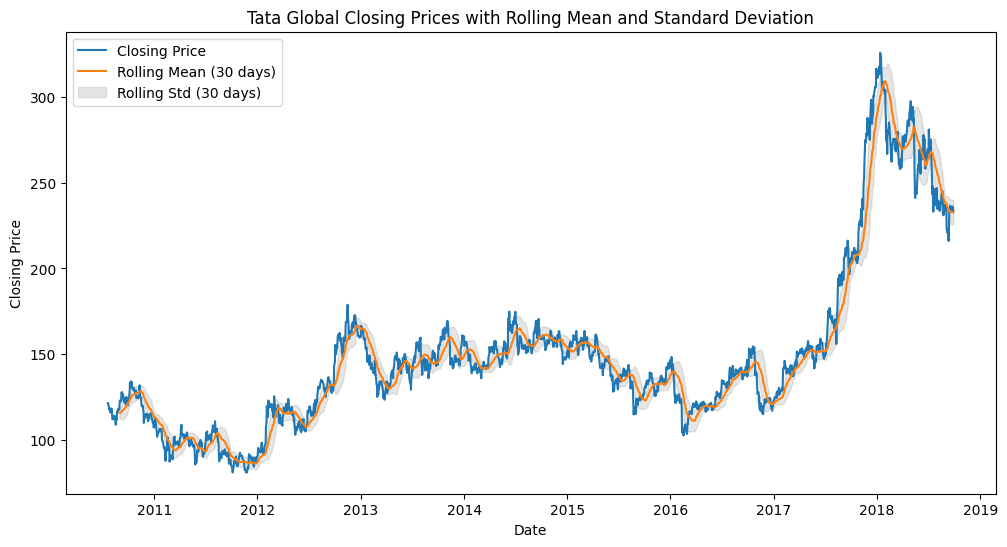

In [65]:
# Plot the rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean (30 days)')
plt.fill_between(df['Date'], rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2, color='gray', label='Rolling Std (30 days)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tata Global Closing Prices with Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

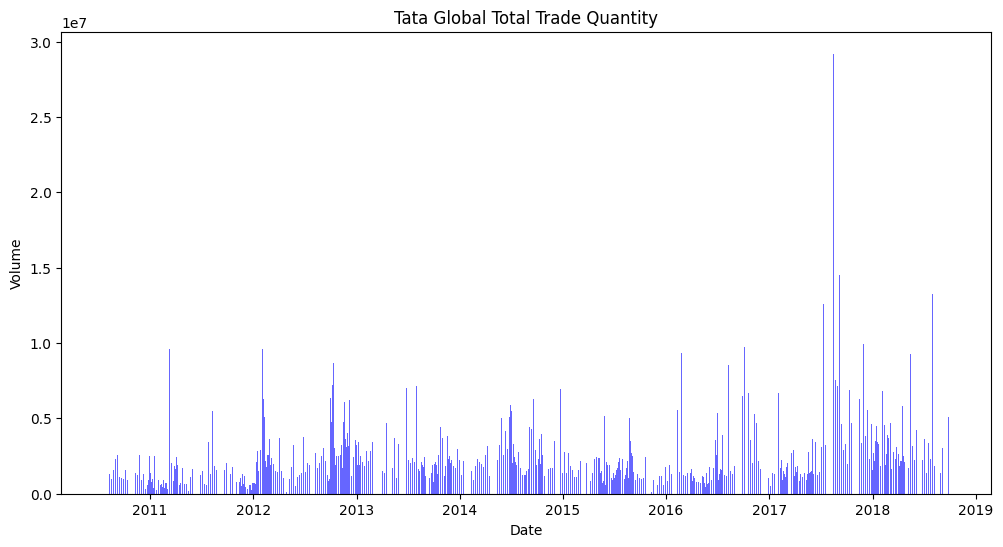

In [66]:
# Plot the Total Trade Quantity
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Total Trade Quantity'], color='blue', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Tata Global Total Trade Quantity')
plt.show()

In [67]:
# Extend the dataset to simulate future predictions (e.g., 30 days beyond the available data)
extended_dates = pd.date_range(start=df['Date'].max(), periods=30, freq='D')
extended_dates = pd.DataFrame({'Date': extended_dates})
extended_df = pd.concat([df, extended_dates], ignore_index=True)

In [68]:
# Preprocess the extended dataset for prediction
extended_dataset = scaler.transform(extended_df[['Close']].values.astype(float))
X_extended, y_extended = create_sequences(extended_dataset, look_back)
X_extended = np.reshape(X_extended, (X_extended.shape[0], X_extended.shape[1], 1))

In [69]:
# Generate predictions for the extended dataset
extended_predict = model.predict(X_extended)
extended_predict = scaler.inverse_transform(extended_predict)

64/64 [==============================] - 0s 3ms/step


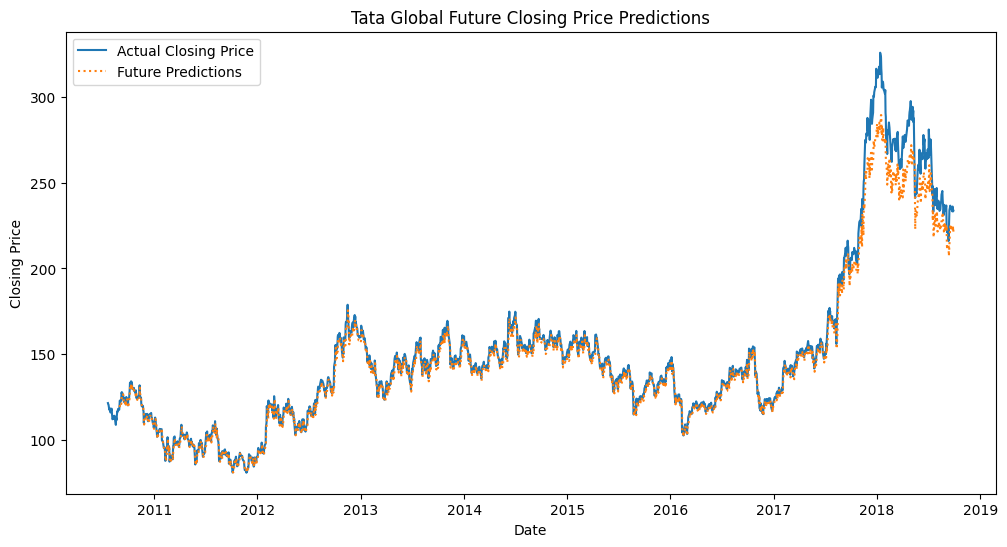

In [70]:
# Plot the actual data and future predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Actual Closing Price')
plt.plot(extended_df.iloc[look_back:]['Date'], extended_predict, label='Future Predictions', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tata Global Future Closing Price Predictions')
plt.legend()
plt.show()

In [71]:
# Filter the data for the year 2018
df_2018 = df[df['Date'].dt.year == 2018]

# Create a DataFrame for actual and predicted closing prices in 2018
dates_2018 = df_2018['Date'][look_back + 1:].reset_index(drop=True)  # Adjusted indexing
actual_prices_2018 = df_2018['Close'][look_back:-1].reset_index(drop=True)  # Adjusted indexing
predicted_prices_2018 = extended_predict[-len(dates_2018):].flatten()  # Flattening the predicted prices array

closing_prices_2018_df = pd.DataFrame({'Date': dates_2018, 'Actual': actual_prices_2018, 'Predicted': predicted_prices_2018})

# Display the actual and predicted closing prices for the year 2020 in a tabular form
print(closing_prices_2018_df)

          Date  Actual   Predicted
0   2018-02-15  281.95  257.671783
1   2018-02-16  279.05  257.484558
2   2018-02-19  275.60  244.833466
3   2018-02-20  267.95  256.662445
4   2018-02-21  262.85  252.915573
..         ...     ...         ...
149 2018-09-24  234.60         NaN
150 2018-09-25  233.30         NaN
151 2018-09-26  236.10         NaN
152 2018-09-27  234.25         NaN
153 2018-09-28  233.25         NaN

[154 rows x 3 columns]


In [72]:
# Calculate the 50-day and 200-day moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

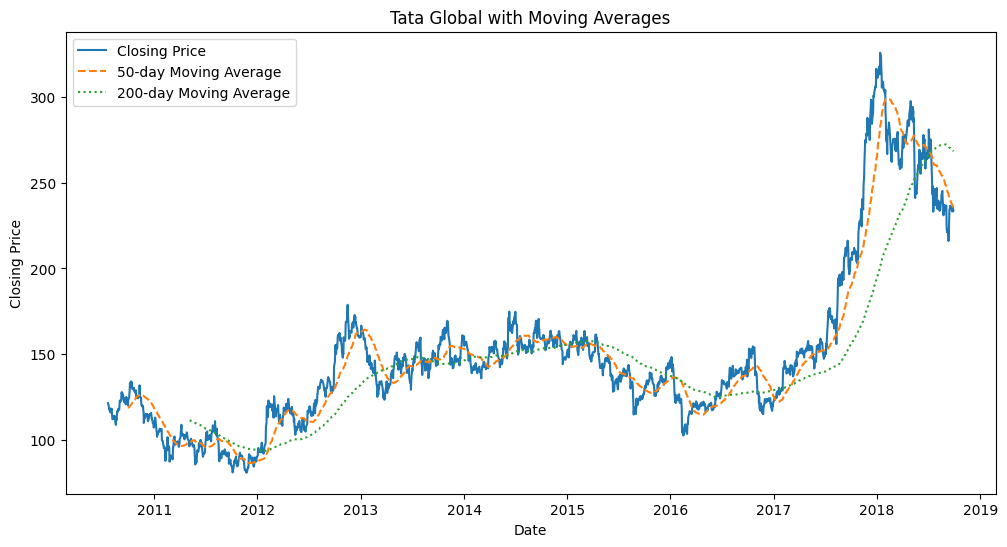

In [73]:
# Plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['MA_50'], label='50-day Moving Average', linestyle='dashed')
plt.plot(df['Date'], df['MA_200'], label='200-day Moving Average', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tata Global with Moving Averages')
plt.legend()
plt.show()